In [1]:
"""
Created on Mon Apr 15 19:43:04 2019

Updated on Wed Jan 29 10:18:09 2020

@author: created by Sowmya Myneni and updated by Dijiang Huang
"""

'\nCreated on Mon Apr 15 19:43:04 2019\n\nUpdated on Wed Jan 29 10:18:09 2020\n\n@author: created by Sowmya Myneni and updated by Dijiang Huang\n'

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 1


In [3]:
import os
import multiprocessing

# Number of logical CPUs
num_cores = multiprocessing.cpu_count()
print(f"Number of CPU cores available: {num_cores}")

Number of CPU cores available: 16


In [4]:
# Configure TensorFlow to use all available CPU cores
#tf.config.threading.set_intra_op_parallelism_threads(0)  # Use all intra-operation threads
#tf.config.threading.set_inter_op_parallelism_threads(0)  # Use all inter-operation threads

# FNN Sample SA

In [6]:
########################################
# Part 1 - Data Pre-Processing
#######################################

# To load a dataset file in Python, you can use Pandas. Import pandas using the line below
import pandas as pd
# Import numpy to perform operations on the dataset
import numpy as np

## Variable Setup

In [7]:
# Variable Setup
# Available datasets: KDDTrain+.txt, KDDTest+.txt, etc. More read Data Set Introduction.html within the NSL-KDD dataset folder
# Type the training dataset file name in ''
#TrainingDataPath='NSL-KDD/'
#TrainingData='KDDTrain+_20Percent.txt'
# Batch Size
BatchSize=10
# Epohe Size
NumEpoch=10

## Import Training Dataset

In [11]:
# Import dataset.
# Dataset is given in TraningData variable You can replace it with the file 
# path such as “C:\Users\...\dataset.csv’. 
# The file can be a .txt as well. 
# If the dataset file has header, then keep header=0 otherwise use header=none
# reference: https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/
dataset_train = pd.read_csv('Training-a1-a3.csv', header=None)

In [12]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113322 entries, 0 to 113321
Data columns (total 43 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       113322 non-null  int64  
 1   1       113322 non-null  object 
 2   2       113322 non-null  object 
 3   3       113322 non-null  object 
 4   4       113322 non-null  int64  
 5   5       113322 non-null  int64  
 6   6       113322 non-null  int64  
 7   7       113322 non-null  int64  
 8   8       113322 non-null  int64  
 9   9       113322 non-null  int64  
 10  10      113322 non-null  int64  
 11  11      113322 non-null  int64  
 12  12      113322 non-null  int64  
 13  13      113322 non-null  int64  
 14  14      113322 non-null  int64  
 15  15      113322 non-null  int64  
 16  16      113322 non-null  int64  
 17  17      113322 non-null  int64  
 18  18      113322 non-null  int64  
 19  19      113322 non-null  int64  
 20  20      113322 non-null  int64  
 21  21      11

In [13]:
dataset_train.describe()

,0,4,5,6,7,8,9,10,11,12,...,32,33,34,35,36,37,38,39,40,42
count,113322.000000,1.133220e+05,1.133220e+05,113322.000000,113322.000000,113322.000000,113322.00000,113322.000000,113322.000000,113322.000000,...,113322.000000,113322.000000,113322.000000,113322.000000,113322.000000,113322.000000,113322.000000,113322.000000,113322.000000,113322.000000
mean,100.224811,8.281767e+03,2.643902e+03,0.000221,0.025220,0.000097,0.15388,0.000829,0.431161,0.309684,...,123.833819,0.532846,0.050752,0.092656,0.016153,0.311395,0.305340,0.091564,0.087884,19.901573
std,1008.980950,3.224064e+05,5.051136e+04,0.014851,0.267188,0.013613,1.79114,0.038265,0.495241,25.242551,...,111.849033,0.444796,0.106580,0.233168,0.057117,0.458715,0.458058,0.279031,0.276273,1.717580
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,13.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000
50%,0.000000,5.900000e+01,3.600000e+01,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,83.000000,0.580000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
75%,0.000000,2.900000e+02,7.610000e+02,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.030000,0.010000,1.000000,1.000000,0.000000,0.000000,21.000000
max,40504.000000,8.958152e+07,7.028652e+06,1.000000,3.000000,3.000000,77.00000,4.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


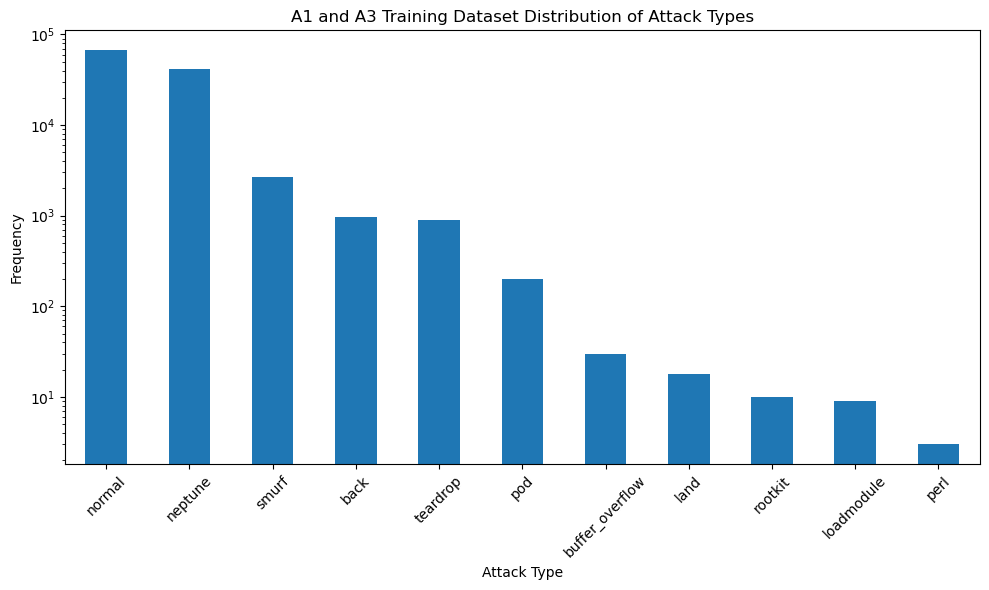

In [14]:
# Identify the column that contains the attack types
# Assuming the column with attack types is named based on the sample data ("neptune", "normal", etc.)
attack_column = dataset_train.columns[-2]  # Second last column seems to have attack types

# Calculate the frequency of each attack type
attack_distribution = dataset_train[attack_column].value_counts()

plt.figure(figsize=(10, 6))
attack_distribution.plot(kind='bar', logy=True)
plt.title('A1 and A3 Training Dataset Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#| label: CSE548_Code_8
X_train = dataset_train.iloc[:, 0:-2].values
X_train

array([[0, 'tcp', 'ftp_data', ..., 0.0, 0.05, 0.0],
       [0, 'udp', 'other', ..., 0.0, 0.0, 0.0],
       [0, 'tcp', 'private', ..., 1.0, 0.0, 0.0],
       ...,
       [0, 'tcp', 'smtp', ..., 0.0, 0.01, 0.0],
       [0, 'tcp', 'klogin', ..., 1.0, 0.0, 0.0],
       [0, 'tcp', 'ftp_data', ..., 0.0, 0.0, 0.0]], dtype=object)

In [16]:
X_train.shape

(113322, 41)

In [17]:
label_column_train = dataset_train.iloc[:, -2].values
label_column_train

array(['normal', 'normal', 'neptune', ..., 'normal', 'neptune', 'normal'],
      dtype=object)

In [ ]:
#| label: CSE548_Code_9
y_train = []
for i in range(len(label_column_train)):
    if label_column_train[i] == 'normal':
        y_train.append(0)
    else:
        y_train.append(1)

# Convert list to array
y_train = np.array(y_train)

In [ ]:
#| label: CSE548_Code_10
y_train

array([0, 0, 1, ..., 0, 1, 0])

In [20]:
y_train.shape

(113322,)

## Import Testing Dataset

In [21]:
# Import dataset.
# Dataset is given in TraningData variable You can replace it with the file 
# path such as “C:\Users\...\dataset.csv’. 
# The file can be a .txt as well. 
# If the dataset file has header, then keep header=0 otherwise use header=none
# reference: https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/
dataset_test = pd.read_csv('Testing-a2-a4.csv', header=None)

In [22]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15017 entries, 0 to 15016
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       15017 non-null  int64  
 1   1       15017 non-null  object 
 2   2       15017 non-null  object 
 3   3       15017 non-null  object 
 4   4       15017 non-null  int64  
 5   5       15017 non-null  int64  
 6   6       15017 non-null  int64  
 7   7       15017 non-null  int64  
 8   8       15017 non-null  int64  
 9   9       15017 non-null  int64  
 10  10      15017 non-null  int64  
 11  11      15017 non-null  int64  
 12  12      15017 non-null  int64  
 13  13      15017 non-null  int64  
 14  14      15017 non-null  int64  
 15  15      15017 non-null  int64  
 16  16      15017 non-null  int64  
 17  17      15017 non-null  int64  
 18  18      15017 non-null  int64  
 19  19      15017 non-null  int64  
 20  20      15017 non-null  int64  
 21  21      15017 non-null  int64  
 22

In [23]:
dataset_test.describe()

,0,4,5,6,7,8,9,10,11,12,...,32,33,34,35,36,37,38,39,40,42
count,15017.000000,1.501700e+04,1.501700e+04,15017.0,15017.000000,15017.000000,15017.000000,15017.000000,15017.000000,15017.000000,...,15017.000000,15017.000000,15017.000000,15017.000000,15017.000000,15017.00000,15017.000000,15017.000000,15017.000000,15017.000000
mean,49.544916,1.226061e+04,2.840014e+03,0.0,0.008390,0.000067,0.104948,0.032297,0.584138,0.124858,...,169.158088,0.742390,0.100937,0.154092,0.027942,0.02463,0.021677,0.102269,0.108134,17.781448
std,1071.012267,5.791198e+05,2.585708e+04,0.0,0.152003,0.008160,1.081785,0.182721,0.492886,8.760658,...,104.665702,0.382547,0.258687,0.317539,0.098983,0.13561,0.139979,0.263894,0.296870,4.672454
min,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000e+01,3.600000e+01,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,53.000000,0.390000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,16.000000
50%,0.000000,1.890000e+02,2.760000e+02,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,250.000000,1.000000,0.000000,0.010000,0.000000,0.00000,0.000000,0.000000,0.000000,21.000000
75%,0.000000,2.870000e+02,1.399000e+03,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.030000,0.060000,0.020000,0.00000,0.000000,0.010000,0.000000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,0.0,3.000000,1.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,21.000000


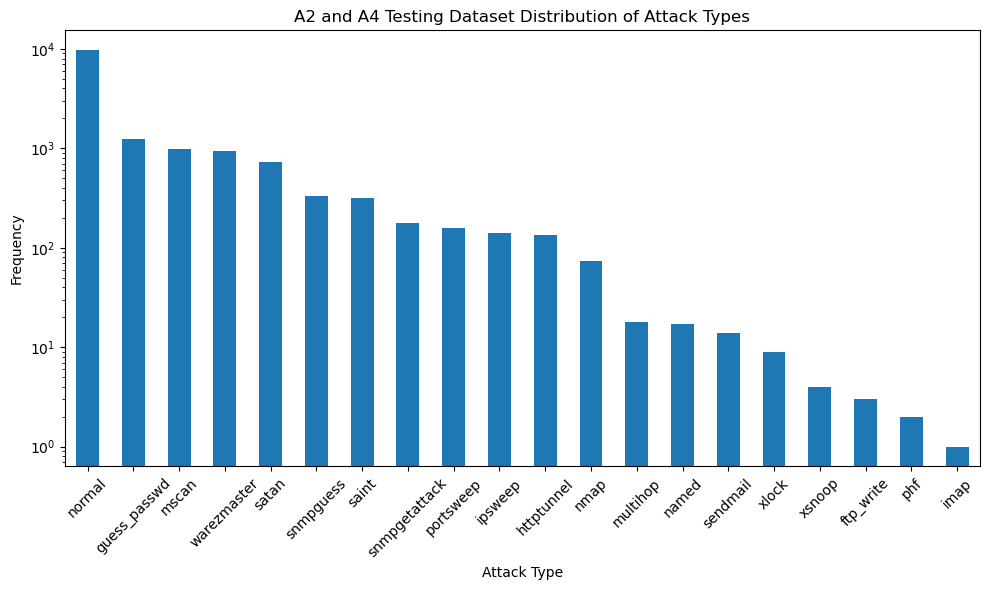

In [24]:
# Identify the column that contains the attack types
# Assuming the column with attack types is named based on the sample data ("neptune", "normal", etc.)
attack_column = dataset_test.columns[-2]  # Second last column seems to have attack types

# Calculate the frequency of each attack type
attack_distribution = dataset_test[attack_column].value_counts()

plt.figure(figsize=(10, 6))
attack_distribution.plot(kind='bar', logy=True)
plt.title('A2 and A4 Testing Dataset Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
X_test = dataset_test.iloc[:, 0:-2].values
X_test

array([[2, 'tcp', 'ftp_data', ..., 0.0, 0.0, 0.0],
       [0, 'icmp', 'eco_i', ..., 0.0, 0.0, 0.0],
       [1, 'tcp', 'telnet', ..., 0.0, 0.83, 0.71],
       ...,
       [0, 'tcp', 'http', ..., 0.0, 0.0, 0.0],
       [0, 'udp', 'domain_u', ..., 0.0, 0.0, 0.0],
       [0, 'tcp', 'sunrpc', ..., 0.0, 0.44, 1.0]], dtype=object)

In [26]:
X_test.shape

(15017, 41)

In [27]:
label_column_test = dataset_test.iloc[:, -2].values
label_column_test

array(['normal', 'saint', 'mscan', ..., 'normal', 'normal', 'mscan'],
      dtype=object)

In [28]:
y_test = []
for i in range(len(label_column_test)):
    if label_column_test[i] == 'normal':
        y_test.append(0)
    else:
        y_test.append(1)

# Convert list to array
y_test = np.array(y_test)

In [29]:
y_test

array([0, 1, 1, ..., 0, 0, 1])

## Encoding categorical data (convert letters/words in numbers)

In [ ]:
#| label: CSE548_Code_11

# The following code work Python 3.7 or newer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(
     # The column numbers to be transformed ([1, 2, 3] represents three columns to be transferred)
    [('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'), [1,2,3])],
    # Leave the rest of the columns untouched
    remainder='passthrough'
)
X_train = np.array(ct.fit_transform(X_train), dtype=np.float64)
X_test  = np.array(ct.transform(X_test) , dtype=np.float64)

In [ ]:

X_train

array([[0.  , 1.  , 0.  , ..., 0.  , 0.05, 0.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 1.  , 0.  , 0.  ],
       ...,
       [0.  , 1.  , 0.  , ..., 0.  , 0.01, 0.  ],
       [0.  , 1.  , 0.  , ..., 1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [32]:
X_train[0]

array([0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
       0.00e+00, 4.91e+02, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e

In [33]:
X_train.shape

(113322, 116)

In [34]:
X_test

array([[0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.83, 0.71],
       ...,
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.44, 1.  ]])

In [35]:
X_test.shape

(15017, 116)

## Perform feature scaling

In [36]:
# Perform feature scaling. For ANN you can use StandardScaler, for RNNs recommended is 
# MinMaxScaler. 
# referece: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# https://scikit-learn.org/stable/modules/preprocessing.html
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  # Scaling to the range [0,1]
X_test  = sc.fit_transform(X_test)

In [37]:
X_train

array([[-0.19511653,  0.42713604, -0.36510181, ..., -0.66659951,
        -0.14895839, -0.31810766],
       [-0.19511653, -2.34117451,  2.73896205, ..., -0.66659951,
        -0.32815058, -0.31810766],
       [-0.19511653,  0.42713604, -0.36510181, ...,  1.51653833,
        -0.32815058, -0.31810766],
       ...,
       [-0.19511653,  0.42713604, -0.36510181, ..., -0.66659951,
        -0.29231215, -0.31810766],
       [-0.19511653,  0.42713604, -0.36510181, ...,  1.51653833,
        -0.32815058, -0.31810766],
       [-0.19511653,  0.42713604, -0.36510181, ..., -0.66659951,
        -0.32815058, -0.31810766]])

In [38]:
y_train

array([0, 0, 1, ..., 0, 1, 0])

# Part 2: Building FNN

In [39]:
########################################
# Part 2: Building FNN
#######################################

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Input

## Initializing the ANN

In [40]:
# Initialising the ANN
# Reference: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
classifier = Sequential()
classifier

## Adding the input layer and the first hidden layer, 6 nodes, input_dim specifies the number of variables

In [41]:
# Adding the input layer and the first hidden layer, 6 nodes, input_dim specifies the number of variables
# rectified linear unit activation function relu, reference: https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/
# Adding the input layer with Input() and the first hidden layer
classifier.add(Input(shape=(len(X_train[0]),)))  # Input layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# Adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

## Compiling the ANN

In [42]:
# Compiling the ANN, 

# Gradient descent algorithm “adam“, Reference: https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

# This loss is for a binary classification problems and is defined in Keras as “binary_crossentropy“, Reference: https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Fitting the ANN to the Training set

In [ ]:
# Fitting the ANN to the Training set
# Train the model so that it learns a good (or good enough) mapping of rows of input data to the output classification.
# add verbose=0 to turn off the progress report during the training
# To run the whole training dataset as one Batch, assign batch size: BatchSize=X_train.shape[0#]
#classifierHistory = classifier.fit(X_train, y_train, batch_size = BatchSize, epochs = NumEpoch)

Epoch 1/10
11333/11333 [==============================] - 26s 2ms/step - loss: 0.0347 - accuracy: 0.9885
Epoch 2/10
11333/11333 [==============================] - 26s 2ms/step - loss: 0.0137 - accuracy: 0.9960
Epoch 3/10
11333/11333 [==============================] - 25s 2ms/step - loss: 0.0106 - accuracy: 0.9969
Epoch 4/10
11333/11333 [==============================] - 25s 2ms/step - loss: 0.0095 - accuracy: 0.9974
Epoch 5/10
11333/11333 [==============================] - 26s 2ms/step - loss: 0.0084 - accuracy: 0.9977
Epoch 6/10
11333/11333 [==============================] - 26s 2ms/step - loss: 0.0076 - accuracy: 0.9979
Epoch 7/10
11333/11333 [==============================] - 26s 2ms/step - loss: 0.0071 - accuracy: 0.9981
Epoch 8/10
11333/11333 [==============================] - 25s 2ms/step - loss: 0.0068 - accuracy: 0.9981
Epoch 9/10
11333/11333 [==============================] - 25s 2ms/step - loss: 0.0067 - accuracy: 0.9981
Epoch 10/10
11333/11333 [==============================

## Save the Fitted Model

In [ ]:
classifier.save("fitted_FNN_model_SA.keras")  # Save the model in HDF5 format

# Save the history
#import json
#with open("fitted_FNN_model_history_SA.json", "w") as f:
#    json.dump(classifierHistory.history, f)

## Load the Model if Necessary

In [45]:
#from keras.models import load_model

#classifier = load_model("fitted_FNN_model_SA.keras")  # Load the saved model

# Load the history
#import json
#with open("fitted_FNN_model_history_SA.json", "r") as f:
#    classifierHistory = json.load(f)

In [46]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 702       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 751
Trainable params: 751
Non-trainable params: 0
_________________________________________________________________


## Evaluate the keras model for the provided model and dataset

In [47]:
from sklearn.metrics import classification_report

### Training Loss and Accuracy

In [48]:
loss_train, accuracy_train = classifier.evaluate(X_train, y_train)

3542/3542 [==============================] - 4s 1ms/step - loss: 0.0061 - accuracy: 0.9984


In [49]:
print('Print the training loss and the accuracy of the model on the dataset')
print('Loss [0,1]: {0:0.4f} Accuracy [0,1]: {1:0.4f}'.format(loss_train, accuracy_train))

Print the training loss and the accuracy of the model on the dataset
Loss [0,1]: 0.0061 Accuracy [0,1]: 0.9984


### Testing Loss and Accuracy

In [50]:
loss_test, accuracy_test = classifier.evaluate(X_test, y_test)

470/470 [==============================] - 1s 1ms/step - loss: 2.0659 - accuracy: 0.7774


In [51]:
print('Print the testing loss and the accuracy of the model on the dataset')
print('Loss [0,1]: {0:0.4f} Accuracy [0,1]: {1:0.4f}'.format(loss_test, accuracy_test))

Print the testing loss and the accuracy of the model on the dataset
Loss [0,1]: 2.0659 Accuracy [0,1]: 0.7774


# Part 3 - Making predictions and evaluating the model

In [52]:
########################################
# Part 3 - Making predictions and evaluating the model
#######################################

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.9)   # y_pred is 0 if less than 0.9 or equal to 0.9, y_pred is 1 if it is greater than 0.9

In [53]:
y_pred.shape

(15017, 1)

In [54]:
y_pred[:5]

array([[False],
       [False],
       [ True],
       [False],
       [False]])

In [55]:
y_test[:5]

array([0, 1, 1, 0, 0])

In [56]:
# summarize the first 5 cases
for i in range(10):
    print('{} (expected {})'.format(y_pred[i], y_test[i]))

[False] (expected 0)
[False] (expected 1)
[ True] (expected 1)
[False] (expected 0)
[False] (expected 0)
[False] (expected 1)
[False] (expected 0)
[False] (expected 1)
[ True] (expected 1)
[False] (expected 0)


## Making the Confusion Matrix

Print the Confusion Matrix:
[ TN, FP ]
[ FN, TP ]=
[[8666 1045]
 [3007 2299]]
              precision    recall  f1-score   support

           0       0.74      0.89      0.81      9711
           1       0.69      0.43      0.53      5306

    accuracy                           0.73     15017
   macro avg       0.71      0.66      0.67     15017
weighted avg       0.72      0.73      0.71     15017



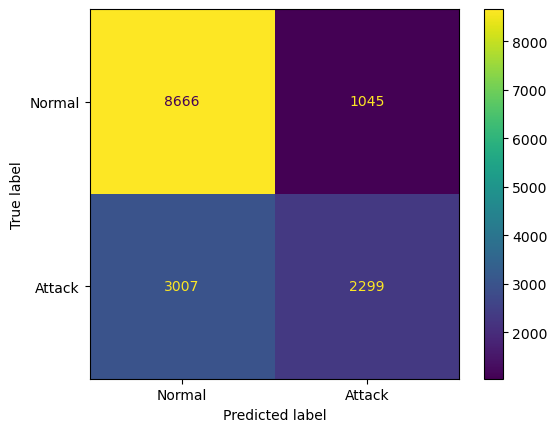

In [57]:
# Making the Confusion Matrix
# [TN, FP ]
# [FN, TP ]
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
print('Print the Confusion Matrix:')
print('[ TN, FP ]')
print('[ FN, TP ]=')
print(cm)
print(classification_report(y_test, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Attack'])
disp.plot()
plt.savefig('confusion_matrix_SA.png')
plt.show()

# Part 4 - Visualizing

## Receiver Operating Characteristic (ROC) Curve and Area Under Curve (AUC)

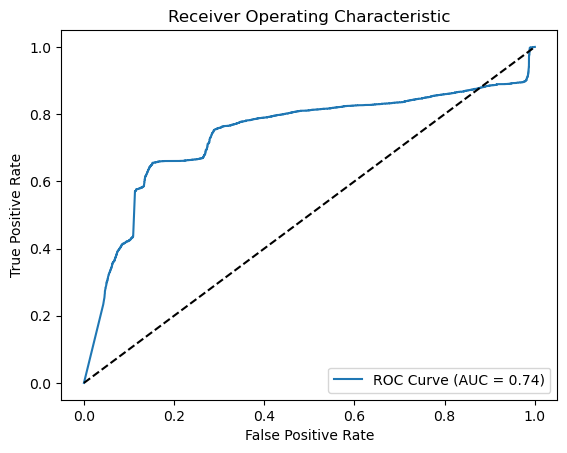

In [58]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Generate probabilities
y_pred_prob = classifier.predict(X_test).ravel()

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('ROC_SA.png')
plt.show()

## Plot the accuracy

Plot the accuracy


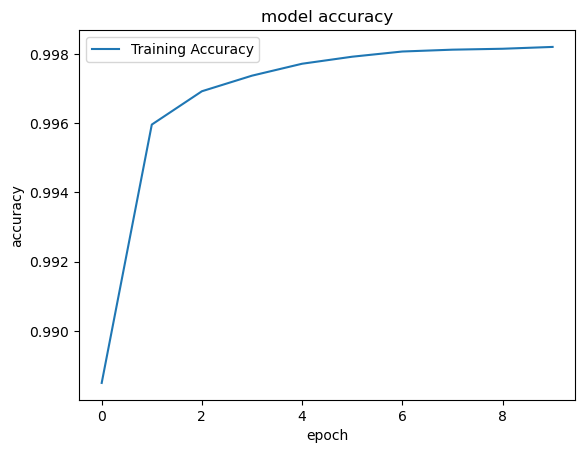

In [60]:
########################################
# Part 4 - Visualizing
#######################################

# Import matplot lib libraries for plotting the figures. 
import matplotlib.pyplot as plt

# You can plot the accuracy
print('Plot the accuracy')
# Keras 2.2.4 recognizes 'acc' and 2.3.1 recognizes 'accuracy'
# use the command python -c 'import keras; print(keras.__version__)' on MAC or Linux to check Keras' version
plt.plot(classifierHistory.history['accuracy'], label='Training Accuracy')
#plt.plot(classifierHistory['accuracy'], label='Training Accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.savefig('accuracy_sample_SA.png')
plt.show()

## Plot the Loss

Plot the loss


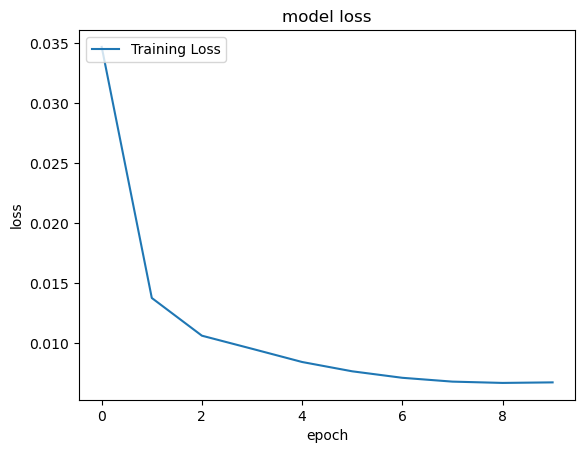

In [61]:
# You can plot history for loss
print('Plot the loss')
plt.plot(classifierHistory.history['loss'], label='Training Loss')
#plt.plot(classifierHistory['loss'], label='Training Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.savefig('loss_sample_SA.png')
plt.show()